# Kaggle Competition Info

### Welcome to one of our "Getting Started" competitions 👋
This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here: https://discord.gg/kaggle

#### Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

### Offical link 
<https://www.kaggle.com/competitions/nlp-getting-started> 

# For this jupyter notebook approach
Using Multi-Layer Perceptrons (MLPs) from scikit-learn for Natural Language Processing (NLP) involves several key steps to prepare text data for the neural network.
1. Text Preprocessing:
Tokenization: Divide text into individual words or subword units (tokens).
Lowercasing: Convert all text to lowercase to standardize words.
Stop Word Removal: Eliminate common words (e.g., "the," "a," "is") that often carry little semantic meaning.
Stemming or Lemmatization: Reduce words to their root form (e.g., "running," "runs," "ran" to "run").
2. Feature Extraction:
Vectorization: Convert processed text into numerical representations that the MLP can understand. Common methods include:
CountVectorizer: Creates a matrix where each row represents a document and each column represents a word, with values indicating the frequency of that word in the document.
TfidfVectorizer: Similar to CountVectorizer but also considers the inverse document frequency, giving less weight to common words and more weight to rare, informative words.
3. MLP Model Training with MLPClassifier or MLPRegressor:
import.

```Python
from sklearn.neural_network import MLPClassifier
```
or

```Python
from sklearn.neural_network import MLPRegressor
```
Initialization: Create an instance of the MLP model, specifying parameters such as:
hidden_layer_sizes: A tuple defining the number of neurons in each hidden layer (e.g., (100, 50) for two hidden layers with 100 and 50 neurons, respectively).
activation: The activation function (e.g., 'relu', 'tanh', 'logistic').
solver: The optimization algorithm (e.g., 'adam', 'sgd', 'lbfgs').
max_iter: The maximum number of training iterations.
random_state: For reproducibility.
Training: Fit the model to your vectorized training data and corresponding labels (for classification) or target values (for regression).
Python

    model.fit(X_train_vectorized, y_train)
4. Prediction and Evaluation:
Prediction: Use the trained model to make predictions on new, unseen vectorized text data.
Python
    ```python
    predictions = model.predict(X_test_vectorized)
    ```
Evaluation: Assess the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; mean squared error for regression).

# Example Workflow (Classification):
```Python

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample text data and labels
texts = ["This is a positive review.", "Terrible service, very bad.", "Good product, happy with it.", "Worst experience ever."]
labels = [1, 0, 1, 0] # 1 for positive, 0 for negative

# 1. & 2. Text Preprocessing and Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, labels, test_size=0.5, random_state=42)

# 3. MLP Model Training
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

# 4. Prediction and Evaluation
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
```

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# MLP
from sklearn.neural_network import MLPClassifier



# Import seaborn
import seaborn as sns

In [17]:
class CFG:
    sampleFile = "/kaggle/input/nlp-getting-started/sample_submission.csv"
    testFile = "/kaggle/input/nlp-getting-started/test.csv"
    trainFile = "/kaggle/input/nlp-getting-started/train.csv"

In [18]:
trainDF = pd.read_csv(CFG.trainFile)
trainDF

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [19]:
testDF = pd.read_csv(CFG.testFile)
testDF

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [20]:
sample = pd.read_csv(CFG.sampleFile)
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


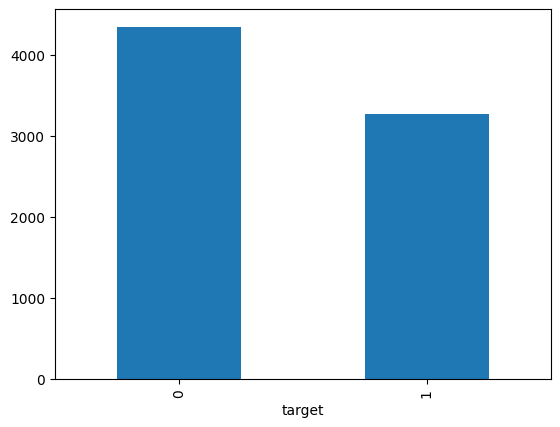

In [21]:
trainDF["target"].value_counts().plot(kind="bar");

## EDA

In [22]:

print("Training Data Shape:", trainDF.shape)
print("Test Data Shape:", trainDF.shape)
print("\nTraining Data Columns:", trainDF.columns.tolist())

Training Data Shape: (7613, 5)
Test Data Shape: (7613, 5)

Training Data Columns: ['id', 'keyword', 'location', 'text', 'target']


In [23]:
trainDF[trainDF["target"]== 0]["text"]

15                                         What's up man?
16                                          I love fruits
17                                       Summer is lovely
18                                      My car is so fast
19                           What a goooooooaaaaaal!!!!!!
                              ...                        
7581    @engineshed Great atmosphere at the British Li...
7582    Cramer: Iger's 3 words that wrecked Disney's s...
7584    These boxes are ready to explode! Exploding Ki...
7587                                   Sirens everywhere!
7593    I just heard a really loud bang and everyone i...
Name: text, Length: 4342, dtype: object

In [24]:
trainDF[trainDF["target"]== 1]["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

### Convert text to vector by TFIDF vector

In [25]:
# convert text to vector by TFIDF vector
tfidf = TfidfVectorizer(stop_words="english")


In [33]:
# xVect = tfidf.fit_transform(trainDF["text"][:5])
trainTfid = tfidf.fit_transform(trainDF["text"]) 
testTfid = tfidf.fit_transform(testDF["text"])

mergeDF = 

combinedTfid = tfidf.fit_transform

In [38]:
tfidf.get_feature_names_out()

array(['00', '000', '000sijjl3t', ..., 'ûókill', 'ûówe', 'ûówere'],
      dtype=object)

In [43]:
print(trainTfid.shape) , print(testTfid.shape)

(7613, 21363)
(3263, 12021)


(None, None)

In [44]:
trainTfid[0].toarray().shape

(1, 21363)